## Manually : 
- [ ] Remove the "impact" option by classifying them into other `issues`
- [ ] Combine some of the causes into one `issues`


## Convention : 
1. Everything is in lower case
2. For boolean values it is always True or False

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
%store -r selected_1

## Helper Fucntions

In [2]:
def split_dates(df, column_name) -> pd.DataFrame:
    if type(df[column_name][0]) == str:
        df[[str(column_name)+'_year', 
            str(column_name)+'_month',
            str(column_name)+'_day']] = df[column_name].str.split("-", expand=True)
    
    if type(df[column_name][0]) == pd._libs.tslibs.timestamps.Timestamp:
        df.loc[:, str(column_name)+'_year'] = df.loc[:, column_name].dt.year
        df.loc[:, str(column_name)+'_month'] = df.loc[:, column_name].dt.month
        df.loc[:, str(column_name)+'_day'] = df.loc[:, column_name].dt.day
    return df

In [3]:
unclean_data = pd.read_excel('Data_Video_Volunteers (translated).xlsx', sheet_name=0)
unclean_data.reset_index(drop=True, inplace=True)
unclean_data.head()

,id,id,state_id,state_name,district,cc_id,cc_name,mentor,story_pitch_date,description,...,impact_facebook_url,impact_facebook_publish_date,impact_youtube_url,impact_youtube_publish_date,impact_video_youtube_subtitle,impact_website_url,impact_website_publish_date,created_by,created_at,updated_at
0,2465,JH_5257,16,Jharkhand,Palamu,438,Bhaskar Raj,Shikha Paharin,2021-08-10,Before the primary health center in Satbarwa b...,...,NaN,NaT,NaN,NaT,NaN,NaN,NaN,Bhaskar Raj,2021-08-11 15:22:27.269,2022-06-01 09:39:22.169
1,2476,JH_5259,16,Jharkhand,Khunti,409,Ravinder Baraik,Shikha Paharin,2021-08-13,"District-Khuti, Block-Raniya Community Health ...",...,NaN,NaT,NaN,NaT,NaN,NaN,NaN,Ravinder Baraik,2021-08-13 03:47:17.737,2022-06-01 09:47:22.692
2,2879,JH_5291,16,Jharkhand,Garhwa,440,Prashant Toppo,Graduate CC,2021-10-22,The ration card of 15 primitive tribal familie...,...,NaN,NaT,NaN,NaT,NaN,NaN,NaN,Prashant Toppo,2021-10-24 08:33:47.204,2022-03-30 13:01:53.727
3,2881,JH_5292,16,Jharkhand,Garhwa,440,Prashant Toppo,Graduate CC,2021-10-23,"total of 18 primitive tribal families, includ...",...,NaN,NaT,NaN,NaT,NaN,NaN,NaN,Prashant Toppo,2021-10-24 09:59:51.898,2022-03-30 13:01:53.727
4,2639,JH_5277,16,Jharkhand,Dhanbad,83,Halima Ejaz,Guruprasad Pednekar,2021-08-01,Follow up video of JH_5075 & JH_5053 - for CHA...,...,NaN,NaT,NaN,NaT,NaN,NaN,NaN,Amrita Anand,2021-09-01 12:31:50.515,2022-06-01 09:41:51.210


In [4]:
# Original column names had a space in the front
unclean_data.columns = unclean_data.columns.str.strip()

In [5]:
unclean_data.columns

Index(['id', 'id', 'state_id', 'state_name', 'district', 'cc_id', 'cc_name',
       'mentor', 'story_pitch_date', 'description',
       ...
       'impact_facebook_url', 'impact_facebook_publish_date',
       'impact_youtube_url', 'impact_youtube_publish_date',
       'impact_video_youtube_subtitle', 'impact_website_url',
       'impact_website_publish_date', 'created_by', 'created_at',
       'updated_at'],
      dtype='object', length=133)

In [6]:
#  Cleaned datafrane will be the combinatino of all the batches

## Cleaning Status - 1
- [x] 'cc_name', 
- [x] 'mentor', 
- [ ] 'description', 
- [x] 'issues',
- [x] 'youtube_publish_date',
- [ ] 'updated_at', 
- [ ] 'district', 
- [ ] 'impact_possible', 
- [x] 'is_impact',
- [ ] 'impact_in_process',
- [ ] 'target_official', 
- [ ] 'call_to_action',
- [ ] 'impact_plan'

In [7]:
batch_1 = unclean_data[selected_1]
batch_1.columns

Index(['cc_name', 'mentor', 'description', 'issues', 'youtube_publish_date',
       'updated_at', 'district', 'impact_possible', 'is_impact',
       'impact_in_process', 'target_official', 'call_to_action',
       'impact_plan'],
      dtype='object')

In [8]:
batch_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cc_name               2002 non-null   object        
 1   mentor                2002 non-null   object        
 2   description           2002 non-null   object        
 3   issues                2002 non-null   object        
 4   youtube_publish_date  2002 non-null   datetime64[ns]
 5   updated_at            2002 non-null   datetime64[ns]
 6   district              2002 non-null   object        
 7   impact_possible       1788 non-null   object        
 8   is_impact             1828 non-null   float64       
 9   impact_in_process     1971 non-null   object        
 10  target_official       1683 non-null   object        
 11  call_to_action        1607 non-null   object        
 12  impact_plan           1681 non-null   object        
dtypes: datetime64[ns](

### Batch-1

In [9]:
#description

In [19]:
#youtube_publish_date

assert batch_1['youtube_publish_date'].isna().sum() == 0
batch_1 = split_dates(batch_1, 'youtube_publish_date')

C:\Users\mistr\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [20]:
batch_1.columns

Index(['cc_name', 'mentor', 'description', 'issues', 'youtube_publish_date',
       'updated_at', 'district', 'impact_possible', 'is_impact',
       'impact_in_process', 'target_official', 'call_to_action', 'impact_plan',
       'youtube_publish_date_year', 'youtube_publish_date_month',
       'youtube_publish_date_day'],
      dtype='object')

<AxesSubplot:xlabel='date'>

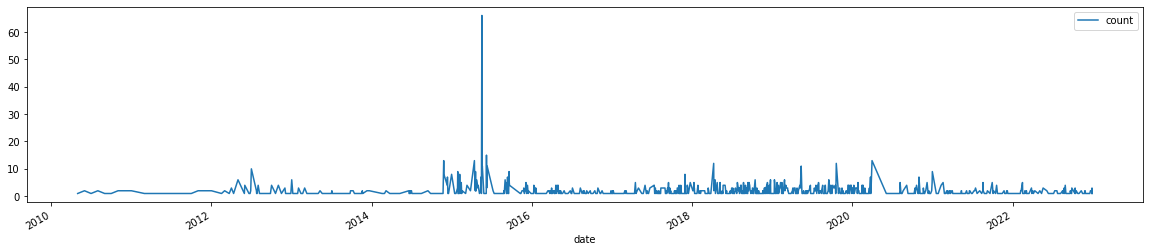

In [11]:
# dates of publishing youtube videos
publish_dates = pd.DataFrame(batch_1['youtube_publish_date'].value_counts(dropna=False).reset_index())
publish_dates.columns = ['date', 'count']
publish_dates.plot('date','count', figsize=(20,4))

In [12]:
updated_dates = pd.DataFrame(batch_1['updated_at'].value_counts().reset_index())

# publish_dates.columns = ['date', 'count']
# publish_dates.plot('date','count', figsize=(20,4))

In [13]:
print([x for x in updated_dates.index])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [14]:
#issues

batch_1.loc[:,'issues'] = batch_1.loc[:,'issues'].str.strip().str.lower()
batch_1.loc[:, 'issues'].value_counts()

C:\Users\mistr\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


anti poverty programs            466
crumbling infrastructure         199
governance and accountability    169
water                            166
education                        162
corruption                       131
health                           106
livelihoods                       92
sanitation                        62
power & energy                    56
forced evictions                  51
labor rights                      46
gender                            39
art & culture                     36
reproductive rights               29
environment                       29
infrastructure                    28
indigenous peoples                20
mining                            14
trafficking & migration           14
rural innovation                  13
development                       13
conflicts                         12
agrarian crisis                   11
religion & faith                  11
impact                             7
natural disaster                   6
t

In [15]:
# is_impact

batch_1.loc[:,'is_impact'] = batch_1.loc[:,'is_impact'].map({1.0:True, 0.0:False, None: 'NA'})
batch_1['is_impact'].value_counts(dropna=False)

False    1425
True      403
NA        174
Name: is_impact, dtype: int64

In [16]:
# impact_possible

# batch_1.loc[:,'impact_possible'].value_counts(dropna=False)

batch_1.loc[:,'impact_possible'] = batch_1.loc[:,'impact_possible'].str.strip().str.lower()
batch_1.loc[:,'impact_possible'] = batch_1.loc[:,'impact_possible'].map({'no':False,'yes':True})  
batch_1.loc[:,'impact_possible'] = batch_1.loc[:,'impact_possible'].fillna("NA")

batch_1.loc[:,'impact_possible'].value_counts(dropna=False)

True     1699
NA        214
False      89
Name: impact_possible, dtype: int64